## Based on discussion of the "Callan Periodic Table of Investment Returns" on Bogleheads.org

Discussion: https://www.bogleheads.org/forum/viewtopic.php?f=10&t=336650

Background and data source: https://www.bogleheads.org/wiki/Callan_periodic_table_of_investment_returns

Callan Institute: https://www.callan.com/periodic-table/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

%matplotlib inline

In [2]:
# import data
df = pd.read_csv("./callan.csv", index_col='Year')

In [3]:
df

,US Fixed Income,High Yield,Large Cap Equity,Global ex-US Fixed Income,Real Estate,Small Cap Equity,Cash Equivalent,Dev ex-US Equity,Emerging Market Equity
Year,,,,,,,,,
2001,8.43,5.28,-11.89,-3.75,-3.81,2.49,4.42,-21.40,-2.61
2002,10.26,-1.37,-22.10,22.37,2.82,-20.48,1.76,-15.80,-6.16
2003,4.10,28.97,28.68,19.36,40.69,47.25,1.15,39.42,55.82
2004,4.34,11.13,10.88,12.54,37.96,18.33,1.33,20.38,25.55
2005,2.43,2.74,4.91,-8.65,15.35,4.55,3.07,14.47,34.00
2006,4.33,11.85,15.79,8.16,42.12,18.37,4.85,25.71,32.17
2007,6.97,1.87,5.49,11.03,-7.39,-1.57,5.00,12.44,39.38
2008,5.24,-26.16,-37.00,4.39,-48.21,-33.79,2.06,-43.56,-53.33
2009,5.93,58.21,26.47,7.53,37.13,27.17,0.21,33.67,78.51


In [4]:
# set RBG colors for plotting. Colors selected to match Callan table.
colors = {
    'US Fixed Income': (.41, .60, .41),
    'High Yield': (.85, .66, .26),
    'Large Cap Equity': (.08, .40, .59),
    'Global ex-US Fixed Income': (.58, .79, .57),
    'Real Estate': (.15, .60, .60),
    'Small Cap Equity': (.56, .66, .74),
    'Cash Equivalent': (.38, .61, .98),
    'Dev ex-US Equity': (.60, .60, .49),
    'Emerging Market Equity': (.96, .59, .21)
}

In [5]:
def draw_box(year, pct, height, facecolor, edgecolor, alpha=1.0):
    '''helper function to create matplotlib rectangle'''
    # set lower left corner
    x = year - 0.5
    y = pct - (height / 2)
    
    # set width (dx) and height (dy) of rectangle
    dx = 1
    dy = height
    
    # create rectangle and add to plot
    rect = mpatches.Rectangle((x,y), dx, dy, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha)
    ax.add_patch(rect)

In [6]:
# find max and min values for plot scaling
df_max = df.max().max()
df_min = df.min().min()

plt_y_max = round(df_max * 1.1, -1)
plt_y_min = round(df_min * 1.1, -1)

plt_x_max = df.index.max() + 1
plt_x_min = df.index.min() - 1

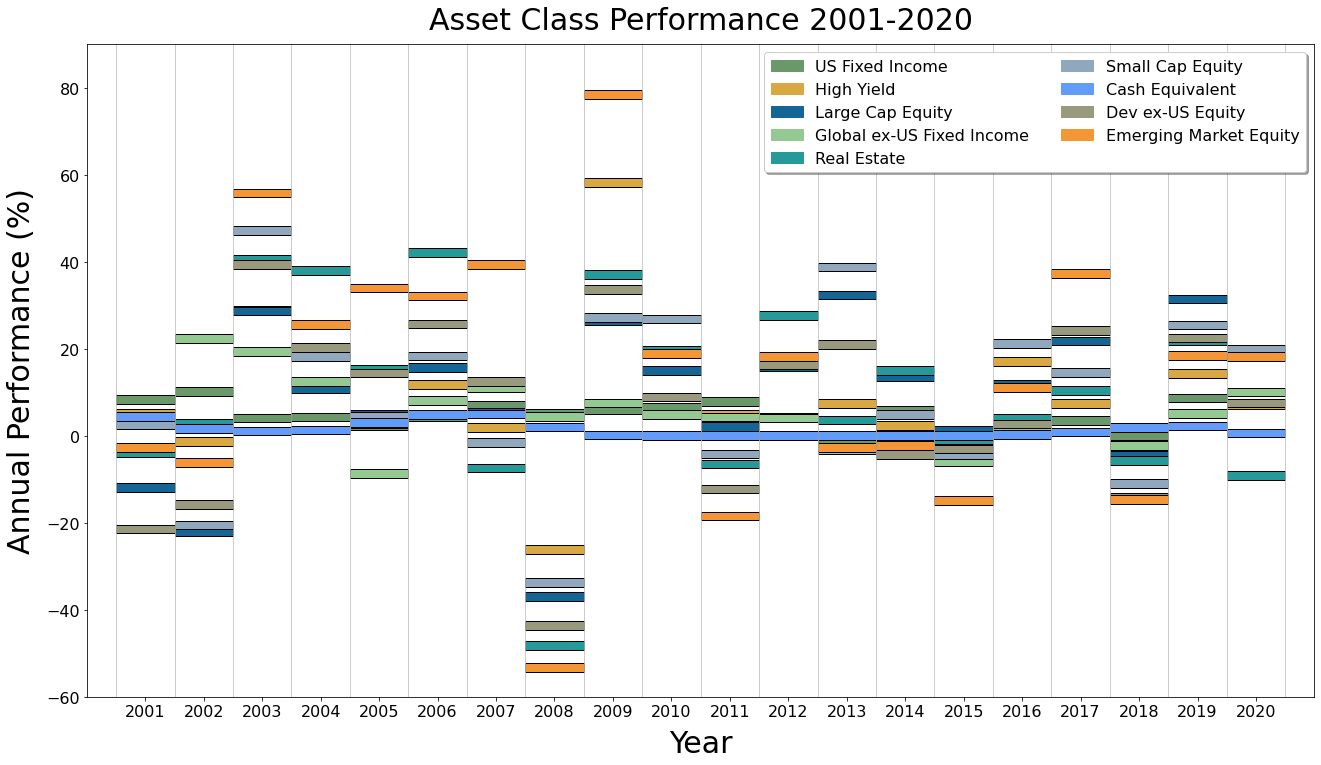

In [7]:
# create plot
fig, ax = plt.subplots(figsize=(22,12))

# set plot limits
plt.xlim([plt_x_min, plt_x_max])
plt.ylim([plt_y_min, plt_y_max])

# add vertical lines
for v in np.linspace(2000.5, 2020.5, num=21):
    plt.axvline(x=v, ymin=0, ymax=1, lw=0.8, color='silver')

# set parameters for rectangles
alpha = 1
height = 2
edgecolor = 'black'

# iterate through table values and call function to draw rectangles
for i in df.index:
    for c in df.columns:
        val = df[c].loc[i]
        draw_box(i, val, height, colors[c], edgecolor, alpha)

# create legend entries
legend = []
for c in df.columns:
    legend.append(mpatches.Patch(color=colors[c], label=c))

# draw legend
plt.legend(handles=legend, ncol=2, loc=1, framealpha=1, shadow=0.5, fontsize=16)

# set axis ticks
ax.set_xticks(df.index)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# label axes and title
ax.set_xlabel('Year', fontsize=30, labelpad=10)
ax.set_ylabel('Annual Performance (%)', fontsize=30, labelpad=10)
ax.set_title('Asset Class Performance 2001-2020', fontsize=30, pad=15)

# display plot        
plt.show()

ax.figure.savefig("callan_chart.png")